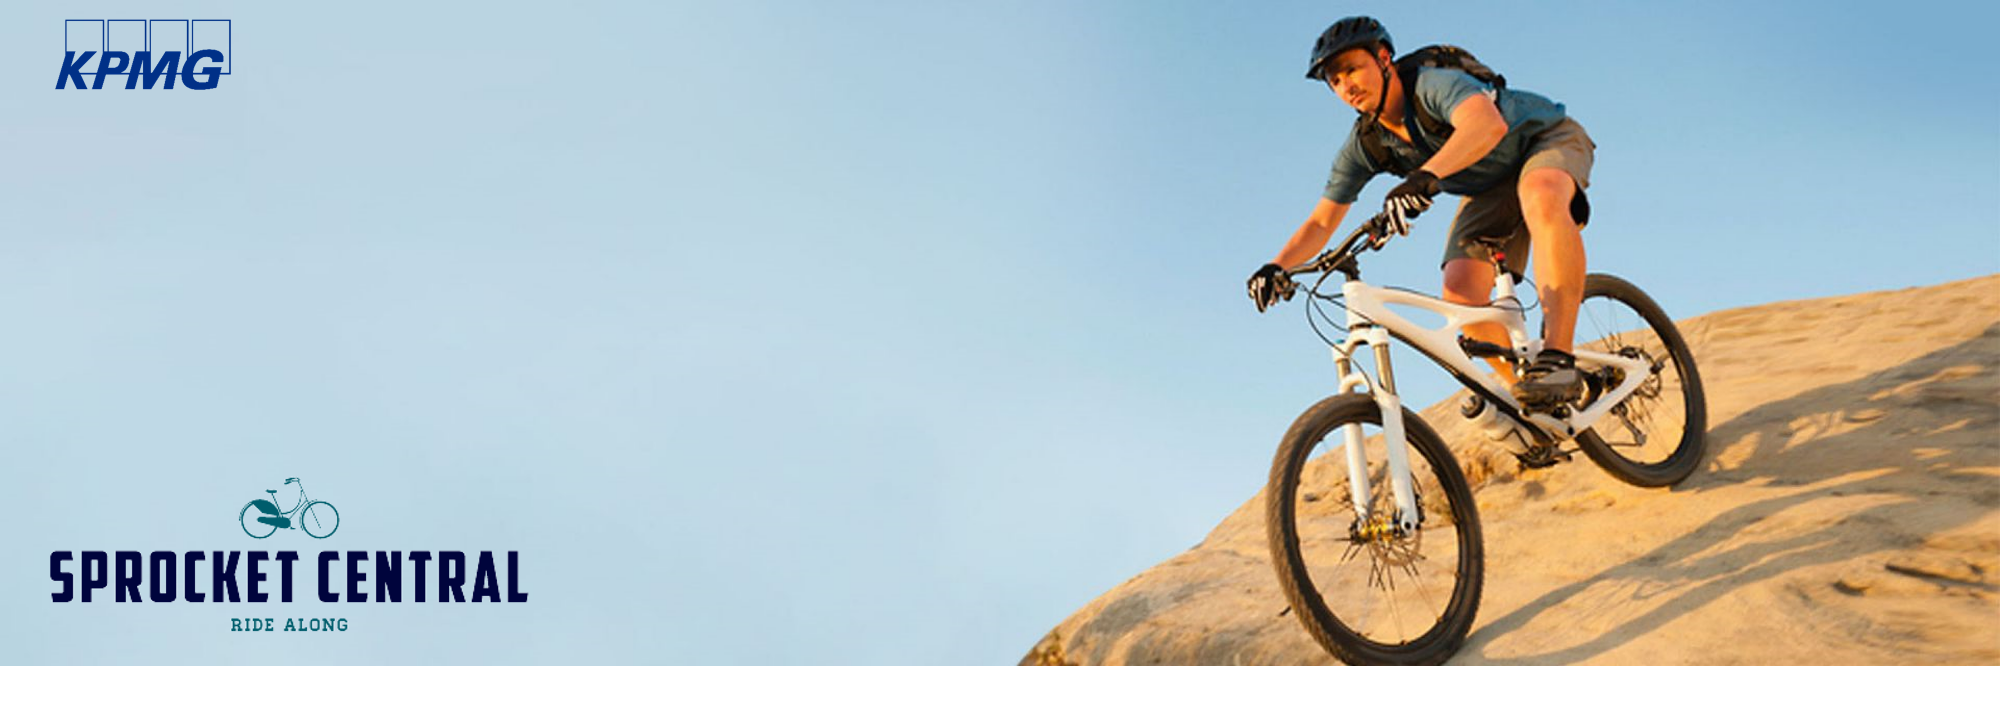

In [1]:
from IPython import display
display.Image('/Users/vamsi/Desktop/KPMG/image.png', width=1200)

## KPMG Internship Module_2
**Project Name: "Customers Recommendation Project"**  
**Client: "Sprocket Central Pty Ltd Company"**

**Project Brief:**  
Sprocket Central Pty Ltd, a medium-sized organization specializing in bikes and cycling accessories, has provided KPMG with three datasets: customer demographic, customer addresses, and transaction data for the past three months. The client needs help analyzing this data to optimize their marketing strategy for the new customer list.

**Module#01 Objective: Data Quality Assessment Report**  
In module #1, we cleaned and integrated the data.

**Module#02 Objective: Data Exploration**  
Module #02 involves conducting a comprehensive data exploratory analysis, RFM analysis, and customer segmentation to identify patterns and prepare for phase #3 of the project, model building.

## Table of Contents

- [1.0. Old Customers](#old-customers) 
- [2.0. New Customers](#new-customers)  
- [3.0. Data Exploration](#data-exploration)  
  - [3.1. Univariate Exploration](#univariate-exploration)  
    - [Univariate analysis summary](#univariate-analysis-summary) 
  - [3.2. Bivariate Exploration](#bivariate-exploration)  
    - [Bivariate analysis summary](#bivariate-analysis-summary) 
  - [3.3. Multivariate Exploration](#multivariate-exploration)  
    - [Multivariate analysis summary](#multivariate-analysis-summary) 
- [4.0. RFM Analysis](#rfm-analysis)  
  - [4.1. Customer Segmentation](#customer-segmentation)  
    - [RFM analysis summary](#rfm-analysis-summary)  

In [2]:
# import libraries
import pandas as pd 
from pandas_profiling import ProfileReport
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import calendar 
import datetime as dt 
import scipy.stats as stats
%matplotlib inline 
sns.set_style("whitegrid")

----------------------------------------------------------------------------------------------------------------------

## 1.0. Old Customers:<a id='old-customers'></a>
### old_customers_cleaned dataset:

In [3]:
# read in cdta dataset from file
old_customers = pd.read_csv('old_customers.csv')

In [4]:
# check first few rows
old_customers.head()

Unnamed: 0  transaction_id  product_id  customer_id transaction_date  \
0           0               1           2         2950       2017-02-25   
1           1           11065           1         2950       2017-10-16   
2           2           18923          62         2950       2017-04-26   
3           3               2           3         3120       2017-05-21   
4           4            6862           4         3120       2017-10-05   

   online_order order_status           brand product_line product_class  ...  \
0         False     Approved           Solex     Standard        Medium  ...   
1         False     Approved  Giant Bicycles     Standard        Medium  ...   
2         False     Approved           Solex     Standard        Medium  ...   
3          True     Approved   Trek Bicycles     Standard        Medium  ...   
4         False     Approved  Giant Bicycles     Standard          High  ...   

  deceased_indicator  owns_car  tenure age  age_group            address  \
0                  N       Yes    10.0  68      51-70  984 Hoepker Court   
1                  N       Yes    10.0  68      51-70  984 Hoepker Court   
2                  N       Yes    10.0  68      51-70  984 Hoepker Court   
3                  N       Yes    10.0  44      31-50    4 Shopko Circle   
4                  N       Yes    10.0  44      31-50    4 Shopko Circle   

   postcode state    country property_valuation  
0      3064   VIC  Australia                  6  
1      3064   VIC  Australia                  6  
2      3064   VIC  Australia                  6  
3      2196   NSW  Australia                  5  
4      2196   NSW  Australia                  5  

[5 rows x 37 columns]

As the unnamed column is not part of our dataset, we will remove it.

In [5]:
# drop unnamed column
old_customers.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
# check summary statistics
old_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19144 entries, 0 to 19143
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19144 non-null  int64  
 1   product_id                           19144 non-null  int64  
 2   customer_id                          19144 non-null  int64  
 3   transaction_date                     19144 non-null  object 
 4   online_order                         19144 non-null  bool   
 5   order_status                         19144 non-null  object 
 6   brand                                19144 non-null  object 
 7   product_line                         19144 non-null  object 
 8   product_class                        19144 non-null  object 
 9   product_size                         19144 non-null  object 
 10  list_price                           19144 non-null  float64
 11  standard_cost               

Based on general observations, the following changes need to be made:

The columns transaction_id, product_id, customer_id, postcode, Transaction_day, and Transaction_year are currently defined as integer data types, but they should be changed to string data types.
The Transaction_date column is currently defined as an object data type, but it should be changed to a datetime data type.  
We will create a new column called "Age Group" to identify the age groups that are most interested in our product.

In [7]:
# ammend column data types
old_customers['transaction_id']=old_customers['transaction_id'].astype(str)
old_customers['product_id']=old_customers['product_id'].astype(str)
old_customers['customer_id']=old_customers['customer_id'].astype(str)
old_customers['postcode']=old_customers['postcode'].astype(str)
old_customers['transaction_day']=old_customers['transaction_day'].astype(str)
old_customers['transaction_year']=old_customers['transaction_year'].astype(str)
old_customers['transaction_date']=pd.to_datetime(old_customers['transaction_date'])   

In [8]:
# numerical Data statistics
old_customers.describe()

list_price  standard_cost        profit  \
count  19144.000000   19144.000000  19144.000000   
mean    1105.991876     555.537766    550.454110   
std      583.083417     405.707664    492.991856   
min       12.010000       7.210000      4.800000   
25%      575.270000     215.140000    133.780000   
50%     1163.890000     507.580000    445.210000   
75%     1635.300000     795.100000    827.160000   
max     2091.470000    1759.850000   1702.550000   

       past_3_years_bike_related_purchases        tenure           age  \
count                         19144.000000  19144.000000  19144.000000   
mean                             48.949540     10.673057     45.091308   
std                              28.636347      5.673566     12.615351   
min                               0.000000      1.000000     21.000000   
25%                              24.000000      6.000000     35.000000   
50%                              48.000000     11.000000     45.000000   
75%                              73.000000     15.000000     54.000000   
max                              99.000000     22.000000     91.000000   

       property_valuation  
count        19144.000000  
mean             7.516193  
std              2.827235  
min              1.000000  
25%              6.000000  
50%              8.000000  
75%             10.000000  
max             12.000000

----------------------------------------------------------------------------------------------------------------------

## 2.0. New Customers:<a id='new-customers'></a>
### new_customers_cleaned dataset:

In [9]:
# read in new_customers_cleaned from file
new_customers = pd.read_csv('new_customers.csv')

In [10]:
# check first few rows
new_customers.head()

Unnamed: 0 first_name  last_name  gender  \
0           0    Chickie    Brister    Male   
1           1      Morly     Genery    Male   
2           2    Ardelis  Forrester  Female   
3           3     Lucine      Stutt  Female   
4           4    Melinda     Hadlee  Female   

   past_3_years_bike_related_purchases         DOB  \
0                                   86  1957-07-12   
1                                   69  1970-03-22   
2                                   10  1974-08-28   
3                                   64  1979-01-28   
4                                   34  1965-09-21   

                    job_title job_industry_category     wealth_segment  \
0             General Manager         Manufacturing      Mass Customer   
1         Structural Engineer              Property      Mass Customer   
2      Senior Cost Accountant    Financial Services  Affluent Customer   
3  Account Representative III         Manufacturing  Affluent Customer   
4           Financial Analyst    Financial Services  Affluent Customer   

  deceased_indicator  ... tenure              address postcode  state  \
0                  N  ...     14     45 Shopko Center     4500    QLD   
1                  N  ...     16    14 Mccormick Park     2113    NSW   
2                  N  ...     10  5 Colorado Crossing     3505    VIC   
3                  N  ...      5   207 Annamark Plaza     4814    QLD   
4                  N  ...     19    115 Montana Place     2093    NSW   

     country property_valuation  Rank     Value  age  age_group  
0  Australia                  6     1  1.718750   65      51-70  
1  Australia                 11     1  1.718750   53      51-70  
2  Australia                  5     1  1.718750   48      31-50  
3  Australia                  1     4  1.703125   44      31-50  
4  Australia                  9     4  1.703125   57      51-70  

[5 rows x 21 columns]

In [11]:
# check first few rows
new_customers.columns

Index(['Unnamed: 0', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'age', 'age_group'],
      dtype='object')

In [12]:
# drop unnamed column
new_customers.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
# check new customers information
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           954 non-null    object 
 1   last_name                            954 non-null    object 
 2   gender                               954 non-null    object 
 3   past_3_years_bike_related_purchases  954 non-null    int64  
 4   DOB                                  954 non-null    object 
 5   job_title                            954 non-null    object 
 6   job_industry_category                954 non-null    object 
 7   wealth_segment                       954 non-null    object 
 8   deceased_indicator                   954 non-null    object 
 9   owns_car                             954 non-null    object 
 10  tenure                               954 non-null    int64  
 11  address                         

## 3.0. Data Exploration:<a id='data-exploration'></a>
### Comparative Analysis - Old Customers and New Customers

### 3.1. Univariate Exploration<a id='univariate-exploration'></a>

The Univariate Exploration section is the initial phase of our analysis where we will focus on exploring the distribution of individual variables. Our goal is to examine the distribution of each variable and detect any outliers or unusual data points. If we identify any such data points, we will conduct further analysis to clean the data and prepare ourselves to investigate relationships between variables.

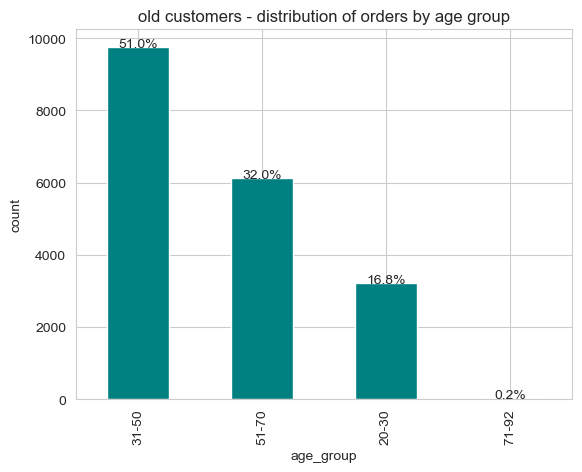

In [14]:
# old customers - distribution of orders by age group
counts = old_customers['age_group'].value_counts()
counts.plot(kind='bar', color='teal')
plt.xlabel('age_group')
plt.ylabel('count')
plt.title('old customers - distribution of orders by age group')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be concluded that individuals aged between 31-50 have placed the highest number of orders, accounting for 51% of the total orders.

This suggests that the main contributors to the orders placed are individuals in their middle age.

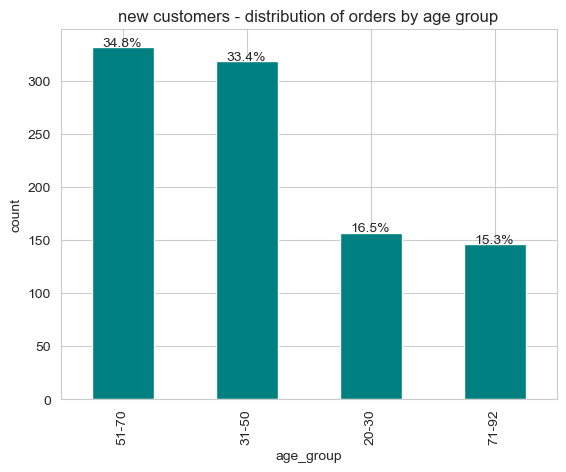

In [15]:
# new customers - distribution of orders by age group
counts = new_customers['age_group'].value_counts()
counts.plot(kind='bar',color='teal')
plt.xlabel('age_group')
plt.ylabel('count')
plt.title('new customers - distribution of orders by age group')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()   

**Graph observations:** Based on the graph, it can be concluded that individuals aged between 31-50 and 51-70 have placed the highest number of orders, accounting for approximately 70% of the total orders.

This suggesting that middle-aged and older adults are the primary contributors to the orders placed.

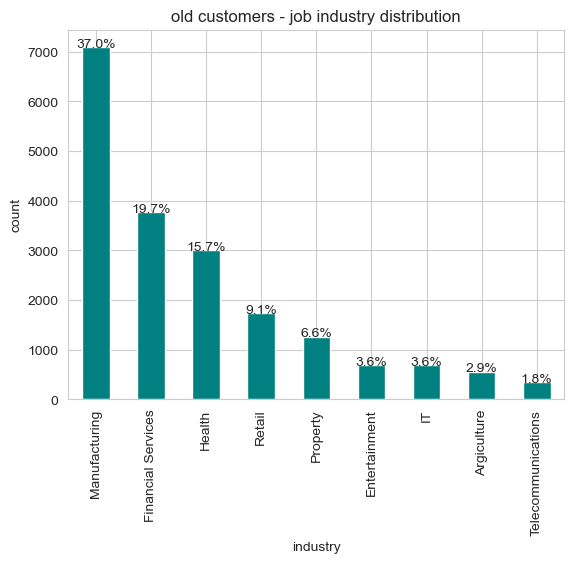

In [16]:
# old customers - distribution of orders by age group
counts = old_customers["job_industry_category"].value_counts()
counts.plot(kind='bar',color='teal')
plt.xlabel('industry')
plt.ylabel('count')
plt.title('old customers - job industry distribution')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be concluded that customers from the manufacturing, financial services, and health sectors have placed the highest number of orders, collectively accounting for approximately 72% of the total orders. Among these three sectors, the manufacturing sector has contributed the most with 37% of the orders, followed by financial services with 19%, and health with 15%.

This indicates that most of our customers work in the manufacturing sector, followed by the financial services and health sectors.

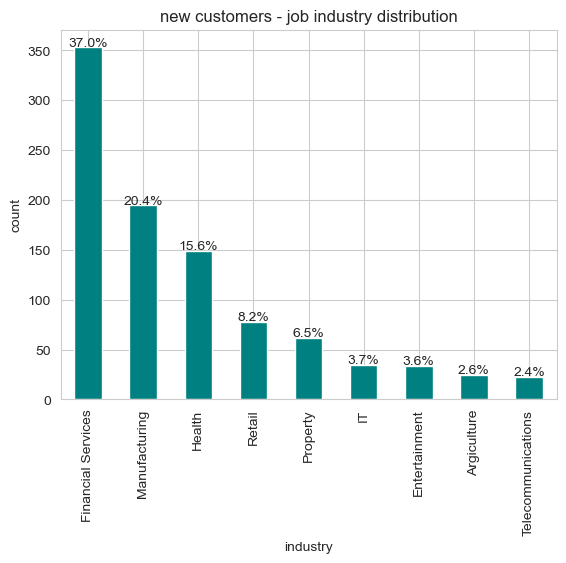

In [17]:
# new customers - distribution of orders by age group
counts = new_customers["job_industry_category"].value_counts()
counts.plot(kind='bar',color='teal')
plt.xlabel('industry')
plt.ylabel('count')
plt.title('new customers - job industry distribution')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be concluded that customers from the financial services, manufacturing, and health sectors have placed the highest number of orders, collectively accounting for approximately 72% of the total orders. Among these three sectors, the financial services sector has contributed the most with 37% of the orders, followed by manufacturing with 20%, and health with 15%.

This indicates that most of our customers work in the financial services , followed by the manufacturing sector and health sectors.

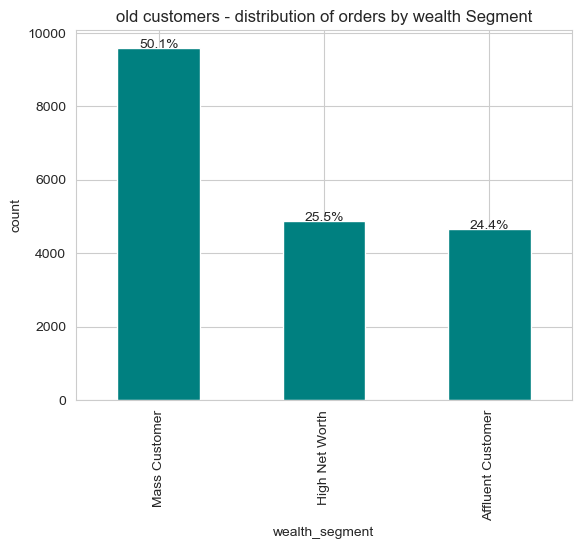

In [18]:
# old customers - distribution of orders by wealth Segment
counts = old_customers["wealth_segment"].value_counts()
counts.plot(kind='bar',color='teal')
plt.xlabel('wealth_segment')
plt.ylabel('count')
plt.title('old customers - distribution of orders by wealth Segment')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be concluded that mass customers have placed the highest number of orders, accounting for approximately 50% of the total orders. Meanwhile, high net worth and affluent customers have contributed almost equally to the remaining orders.

This indicates that the largest segment placing orders is the Average income customers (Mass customers).

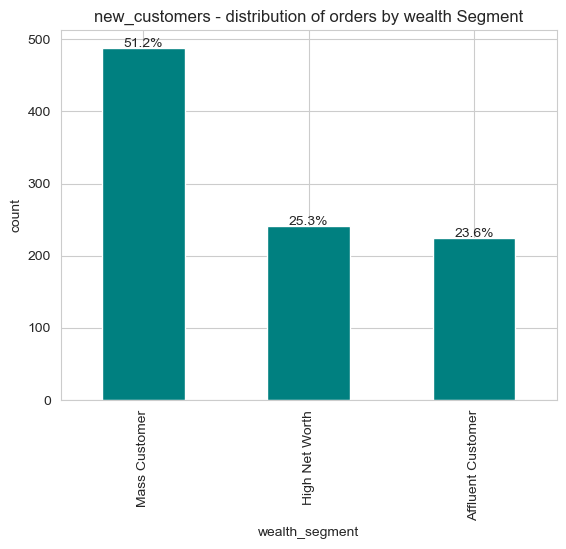

In [19]:
# new_customers - distribution of orders by wealth Segment
counts = new_customers["wealth_segment"].value_counts()
counts.plot(kind='bar',color='teal')
plt.xlabel('wealth_segment')
plt.ylabel('count')
plt.title('new_customers - distribution of orders by wealth Segment')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be concluded that mass customers have placed the highest number of orders, accounting for approximately 50% of the total orders. Meanwhile, high net worth and affluent customers have contributed almost equally to the remaining orders.

This indicates that the largest segment placing orders is the Average income customers (Mass customers).

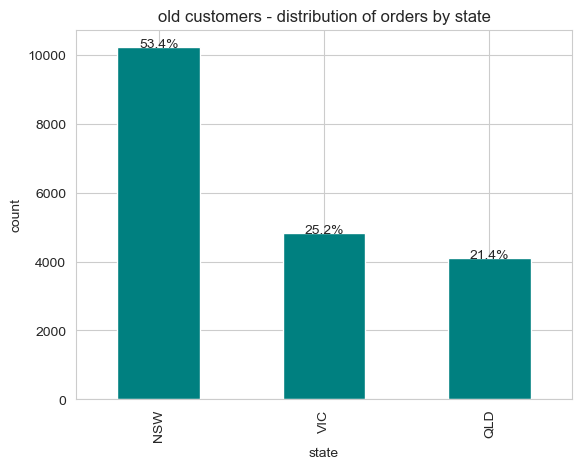

In [20]:
# old customers - distribution of orders by state
counts = old_customers["state"].value_counts()
counts.plot(kind='bar',color='teal')
plt.xlabel('state')
plt.ylabel('count')
plt.title('old customers - distribution of orders by state')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be concluded that customers from New South Wales have placed the highest number of orders, accounting for approximately 53% of the total orders. Meanwhile, Victoria and Queensland have contributed almost equally to the remaining orders.

This indicate that majority of orders are made in the state of NSW in Australia.

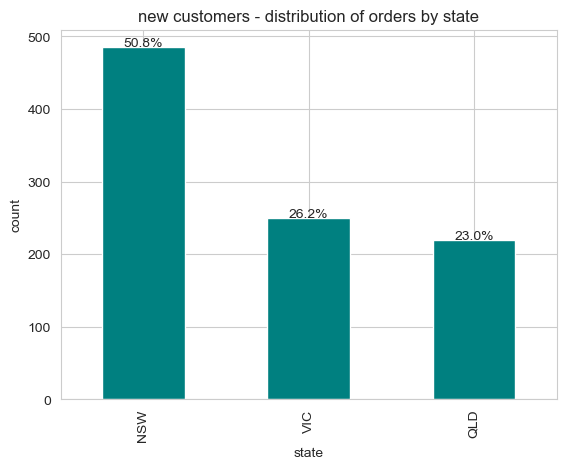

In [21]:
# new customers - distribution of orders by state
counts = new_customers["state"].value_counts()
counts.plot(kind='bar',color='teal')
plt.xlabel('state')
plt.ylabel('count')
plt.title('new customers - distribution of orders by state')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be concluded that customers from New South Wales have placed the highest number of orders, accounting for approximately 50% of the total orders. Meanwhile, Victoria and Queensland have contributed almost equally to the remaining orders.

This indicate that majority of orders are made in the state of NSW in Australia.

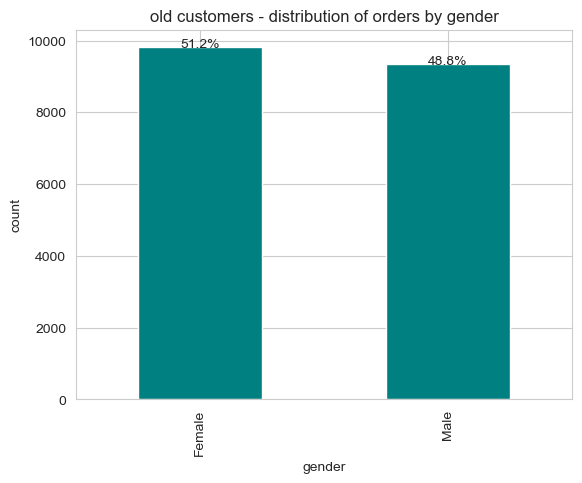

In [22]:
# old customers - distribution of orders by gender
counts = old_customers["gender"].value_counts()
counts.plot(kind='bar',color='teal')
plt.xlabel('gender')
plt.ylabel('count')
plt.title('old customers - distribution of orders by gender')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be inferred that there is a relatively equal distribution of orders between genders, with female customers placing approximately 3% more orders than male customers.

This indicate that women make up the majority of the orders than men and there is a slightly higher demand from women as compared to men.

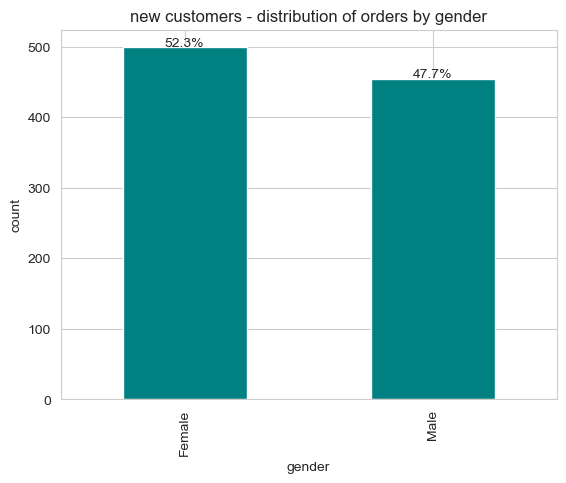

In [23]:
# new customers - distribution of orders by gender
counts = new_customers["gender"].value_counts()
counts.plot(kind='bar',color='teal')
plt.xlabel('gender')
plt.ylabel('count')
plt.title('new customers - distribution of orders by gender')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be inferred that there is a relatively equal distribution of orders between genders, with female customers placing approximately 5% more orders than male customers.

This indicate that women make up the majority of the orders than men and there is a slightly higher demand from women as compared to men.

### Univariate analysis summary:<a id='univariate-analysis-summary'></a>

The distributions of the variables of interest are as follows:

**age_group_old_customers:**  middle age  
**age_group_new_customers:** middle-aged and older adults

**job_industry_category_old_customers:**  manufacturing industry, financial services, and health sectors  
**job_industry_category_new_customers:**  financial services, manufacturing industry, and health sectors

**wealth_segment_old_customers:** Average income customers (Mass customers)  
**wealth_segment_new_customers:** Average income customers (Mass customers)

**state_old_customers:** New South Wales  
**state_new_customers:** New South Wales

**gender_old_customers:** Female  
**gender_new_customers:** Female


----------------------------------------------------------------------------------------------------------------------

### 3.2. Bivariate Exploration:<a id='bivariate-exploration'></a>

In this section, we will examine the relationships between pairs of variables in our dataset.

In the bivariate exploration section, we will analyze the interactions between two variables to understand how they relate to each other. This can involve plotting the variables against each other and examining the resulting patterns, calculating correlation coefficients to quantify the strength and direction of the relationship, and exploring how the relationship may change across different subgroups of the data. By examining these relationships, we can gain insights into how different variables may influence each other and potentially identify areas for further analysis.

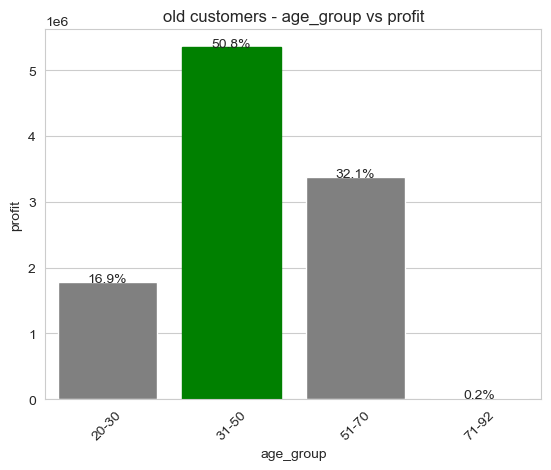

In [24]:
# old customers - age_group vs profit
age_group_profit = old_customers.groupby(['age_group'])['profit'].sum().reset_index()
sns.barplot(data=age_group_profit,x='age_group',y='profit',color='grey');
plt.xlabel('age_group');
plt.ylabel('profit');
plt.xticks(rotation=45)
plt.title("old customers - age_group vs profit");

# add percentages on top of the bars
for i, v in enumerate(age_group_profit['profit']):
    plt.text(i, v + 1, f'{(v / age_group_profit["profit"].sum() * 100):.1f}%', ha='center')
    
# highlight the key takeaways
plt.gca().patches[1].set_color('green')

**Graph observations:** Based on the graph, it can be concluded that individuals aged between 31-50 have contributed the highest number of profit, accounting for 50% of the total profit.

This suggests that the main contributors to the profit gained are individuals in their middle age.

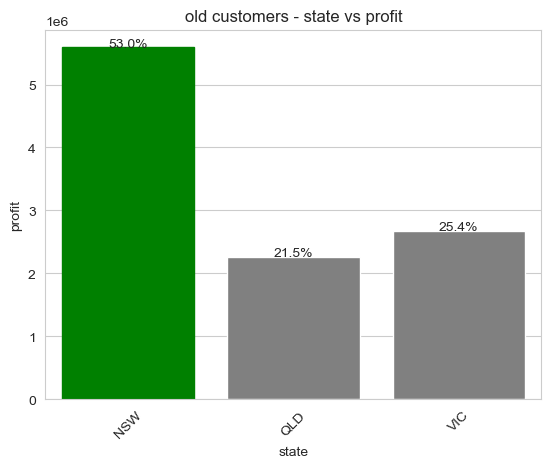

In [25]:
# old customers - state vs profit
state_profit = old_customers.groupby(['state'])['profit'].sum().reset_index()
sns.barplot(data=state_profit,x='state',y='profit',color='grey');
plt.xlabel('state');
plt.ylabel('profit');
plt.xticks(rotation=45)
plt.title("old customers - state vs profit");

# add percentages on top of the bars
for i, v in enumerate(state_profit['profit']):
    plt.text(i, v + 1, f'{(v / state_profit["profit"].sum() * 100):.1f}%', ha='center')
    
# highlight the key takeaways
plt.gca().patches[0].set_color('green')

**Graph observations:** Based on the graph, it can be concluded that individuals from New South Wales have contributed the highest number of profit, accounting for 53% of the total profit.

This indicate that majority of profit comes form the state of NSW in Australia.

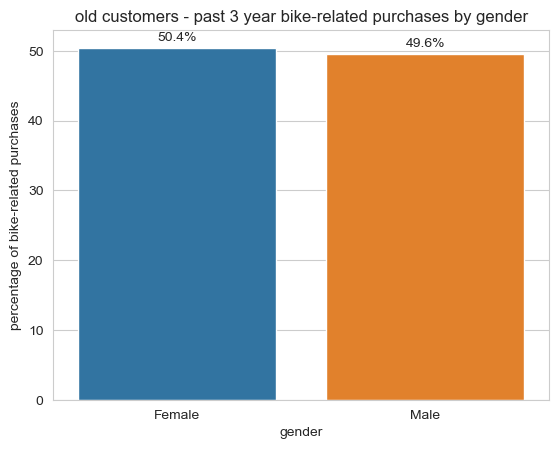

In [26]:
# old customers - past 3 year bike-related purchases by gender
total_purchases = old_customers['past_3_years_bike_related_purchases'].sum()
gender_purchases = old_customers.groupby('gender')['past_3_years_bike_related_purchases'].sum()
gender_percentages = gender_purchases / total_purchases * 100
sns.barplot(x=gender_percentages.index, y=gender_percentages)
plt.xlabel('gender')
plt.ylabel('percentage of bike-related purchases')
plt.title('old customers - past 3 year bike-related purchases by gender')

# Add percentages on top of the bars
for i, v in enumerate(gender_percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be inferred that there is a relatively equal distribution of past 3 year bike related purchases between genders.

This suggests that there was no significant difference in the past 3 year bike-related purchases based on gender.

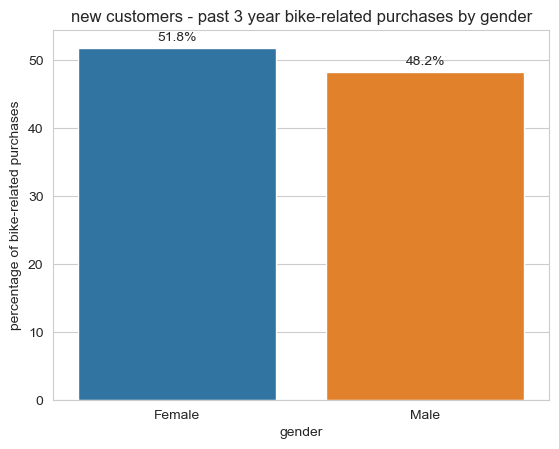

In [27]:
# new customers - past 3 year bike-related purchases by gender
total_purchases = new_customers['past_3_years_bike_related_purchases'].sum()
gender_purchases = new_customers.groupby('gender')['past_3_years_bike_related_purchases'].sum()
gender_percentages = gender_purchases / total_purchases * 100
sns.barplot(x=gender_percentages.index, y=gender_percentages)
plt.xlabel('gender')
plt.ylabel('percentage of bike-related purchases')
plt.title('new customers - past 3 year bike-related purchases by gender')

# Add percentages on top of the bars
for i, v in enumerate(gender_percentages):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be inferred that there is a relatively equal distribution of past 3 year bike-related purchases between genders, with female customers purchasing approximately 4% more bikes than male customers. 

This indicates that women make up a slightly larger proportion of the orders than men, suggesting a slightly higher demand for bikes from women compared to men.

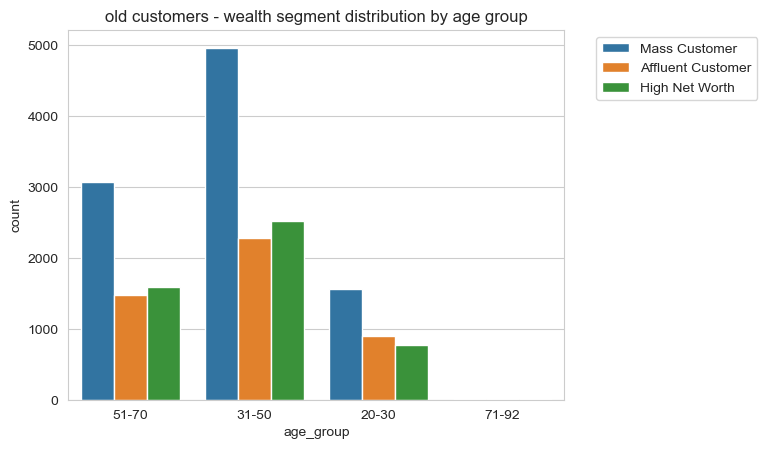

In [28]:
# old customers - wealth segment distribution by age group
sns.countplot(data = old_customers, x = "age_group",hue='wealth_segment')
plt.xlabel('age_group');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("old customers - wealth segment distribution by age group")
plt.show()

**Graph observations:** Based on the graph, it can be inferred that the largest number of customers in all age categories are classified as 'Mass Customer'. The next category is the 'High Net Worth' customers. However, in the 20-30 age group, the 'Affluent Customer' category appears to outperform the 'High Net Worth' customer category.

This indicates that the largest segment placing orders is the Average income customers (Mass customers).

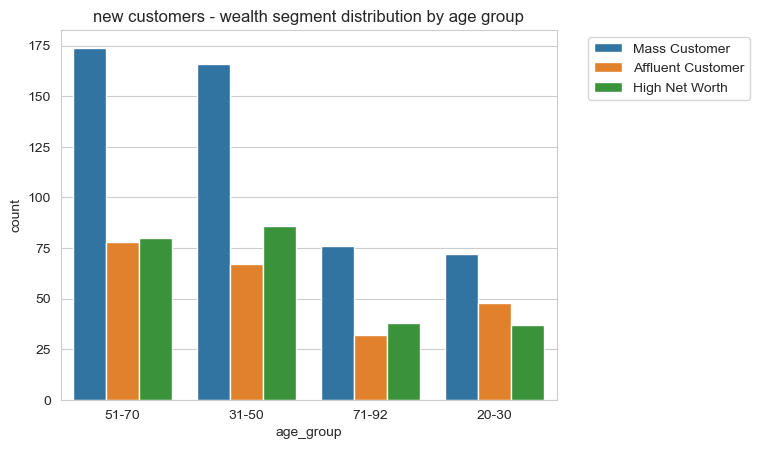

In [29]:
# new customers - wealth segment distribution by age group
sns.countplot(data = new_customers, x = "age_group",hue='wealth_segment')
plt.xlabel('age_group');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("new customers - wealth segment distribution by age group")
plt.show()

**Graph observations:** Based on the graph, it can be inferred that the largest number of customers in all age categories are classified as 'Mass Customer'. The next category is the 'High Net Worth' customers. However, in the 20-30 age group, the 'Affluent Customer' category appears to outperform the 'High Net Worth' customer category.

This indicates that the largest segment placing orders is the Average income customers (Mass customers).

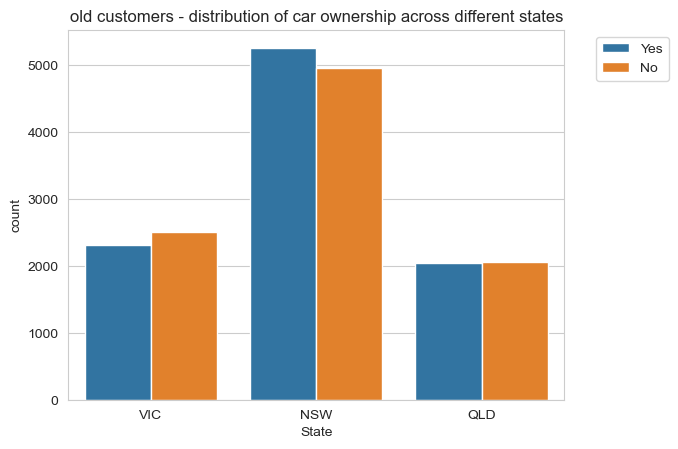

In [30]:
# old customers - distribution of car ownership across different states
sns.countplot(data=old_customers, x="state", hue="owns_car")
plt.xlabel("State")
plt.ylabel("count")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("old customers - distribution of car ownership across different states")
plt.show()

**Graph observations:** Based on the graph, it can be inferred that NSW has the highest proportion of people who  own a car, and it also appears to have the largest sample size as well. QLD, on the other hand, has a more evenly split distribution. VIC seems to have a higher proportion of customers who do not own a car compared to those who does.

This indicates hat NSW has the highest proportion of people who own a car. 

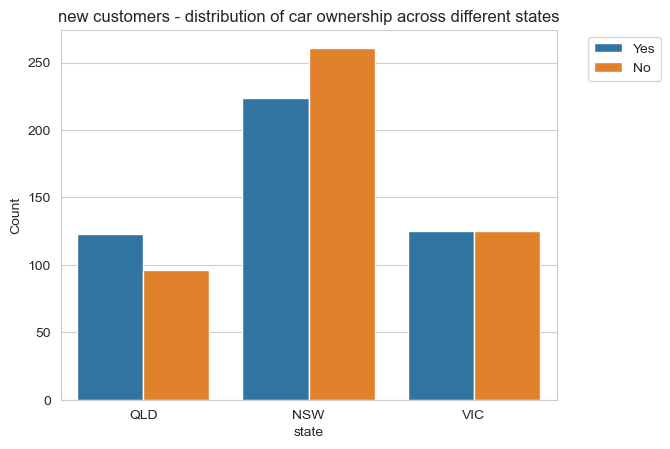

In [31]:
# new customers - distribution of car ownership across different states
sns.countplot(data = new_customers, x = "state",hue='owns_car')
plt.xlabel('state');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("new customers - distribution of car ownership across different states")
plt.show()

**Graph observations:** Based on the graph, it can be inferred that NSW has the highest proportion of people who do not own a car, and it also appears to have the largest sample size as well. Victoria, on the other hand, has a more evenly split distribution. QLD seems to have a higher proportion of customers who own a car compared to those who do not.

This indicates hat NSW has the highest proportion of people who do not own a car. 

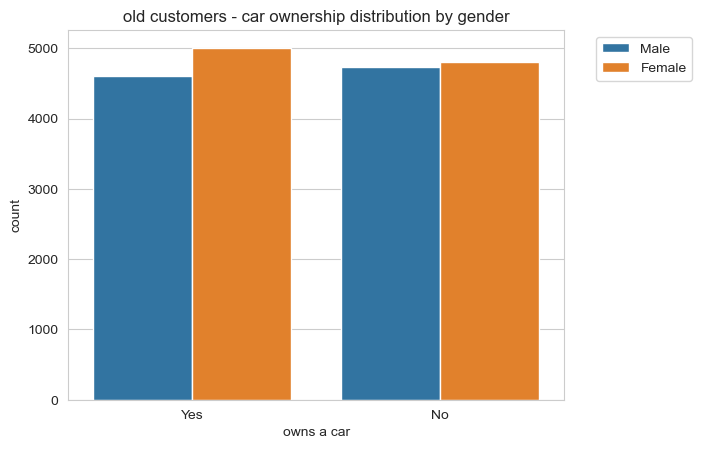

In [32]:
# old customers - car ownership distribution by gender
sns.countplot(data = old_customers, x = "owns_car",hue='gender')
plt.xlabel('owns a car');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("old customers - car ownership distribution by gender")
plt.show()

**Graph observations:** Based on the graph, it can be inferred that women who own a car tend to make more purchases compared to those who don't own a car. 

This suggests that women with car make more purchases.

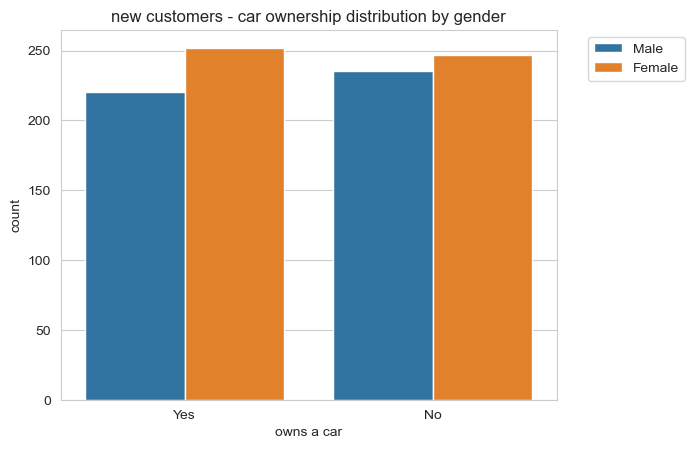

In [33]:
# new customers - car ownership distribution by gender
sns.countplot(data = new_customers, x = "owns_car",hue='gender')
plt.xlabel('owns a car');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("new customers - car ownership distribution by gender")
plt.show()

**Graph observations:** Based on the graph, it can be inferred that women who own a car tend to make more purchases compared to those who don't own a car.

This suggests that women with car make more purchases.

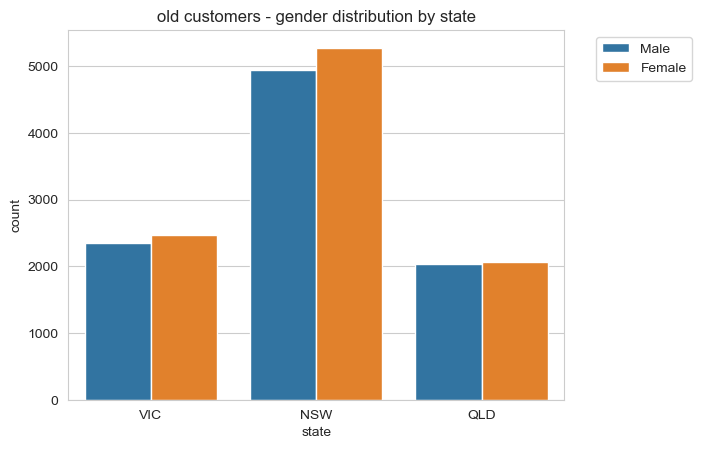

In [34]:
# old customers - gender distribution by state
sns.countplot(data = old_customers, x = "state",hue='gender')
plt.xlabel('state');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("old customers - gender distribution by state")
plt.show()

**Graph observations:** Based on the graph, we can conclude that women make more purchases than men in most states.

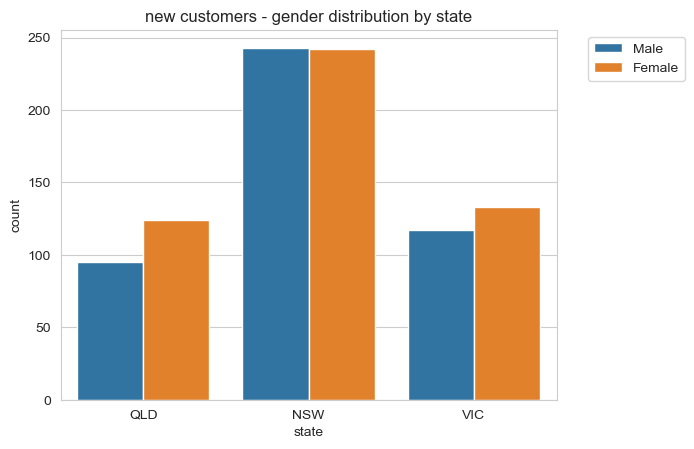

In [35]:
# new customers - gender distribution by state
sns.countplot(data = new_customers, x = "state",hue='gender')
plt.xlabel('state');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("new customers - gender distribution by state")
plt.show()

**Graph observations:** Based on the  graph, we can conclude that women make more purchases than men in most states. However, in NSW, both genders have relatively equal buying patterns.

This suggests that women make more purchases than men in most states.

### Bivariate analysis summary:<a id='bivariate-analysis-summary'></a>

The distributions of the variables of interest are as follows:

**age_group vs profit_old_customers:** middle age

**state vs profit_old_customers:** New South Wales

**past 3 year bike-related purchases by gender_old_customers:** no significant difference in the past 3 year bike-related purchases based on gender.   
**past 3 year bike-related purchases by gender_new_customers:** Female

**wealth segment distribution by age group_old_customers:** Average income customers (Mass customers).  
**wealth segment distribution by age group_new_customers:** Average income customers (Mass customers).

**distribution of car ownership across different states_old_customers:**  NSW has the highest proportion of people who own a car.    
**distribution of car ownership across different states_new_customers:** NSW has the highest proportion of people who do not own a car. 

**car ownership distribution by gender_old_customers:** women with car make more purchases   
**car ownership distribution by gender_new_customers:** women with car make more purchases  

**gender distribution by state_old_customers:** women make more purchases than men in most states  
**gender distribution by state_new_customers:** women make more purchases than men in most states


----------------------------------------------------------------------------------------------------------------------

### 3.3. Multivariate Exploration:<a id='multivariate-exploration'></a>

Exploring relations between multiple variable

Multivariate exploration involves exploring relationships between three or more variables. This type of analysis allows us to investigate more complex relationships between variables and how they interact with each other.

For example, we can examine how the relationship between age and gender affects the purchasing behavior of customers. Or we can investigate how the combination of income and geographic location affects the types of products that customers buy.

Multivariate exploration can be conducted using various statistical techniques such as regression analysis, correlation analysis, and factor analysis. These techniques can help us identify patterns and relationships in our data that may not be apparent through univariate or bivariate analysis.

In summary, multivariate exploration provides a more comprehensive understanding of the complex relationships between variables in our data and can help us make more informed decisions based on these relationships.

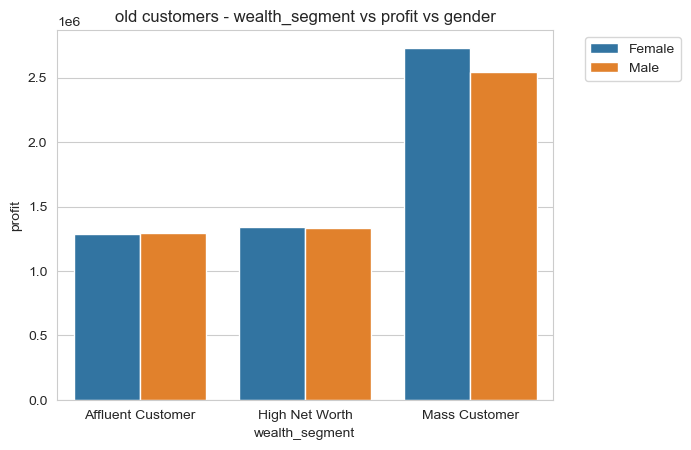

In [36]:
# old customers - wealth_segment vs profit vs gender
wealth_segment_profit = old_customers.groupby(['wealth_segment', 'gender'])['profit'].sum().reset_index()
sns.barplot(data=wealth_segment_profit,x='wealth_segment',y='profit',hue='gender');
plt.xlabel('wealth_segment');
plt.ylabel('profit');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title("old customers - wealth_segment vs profit vs gender");

**Graph observations:** Based on the  graph, we can conclude that the majority of the profit has been generated by female mass customers.

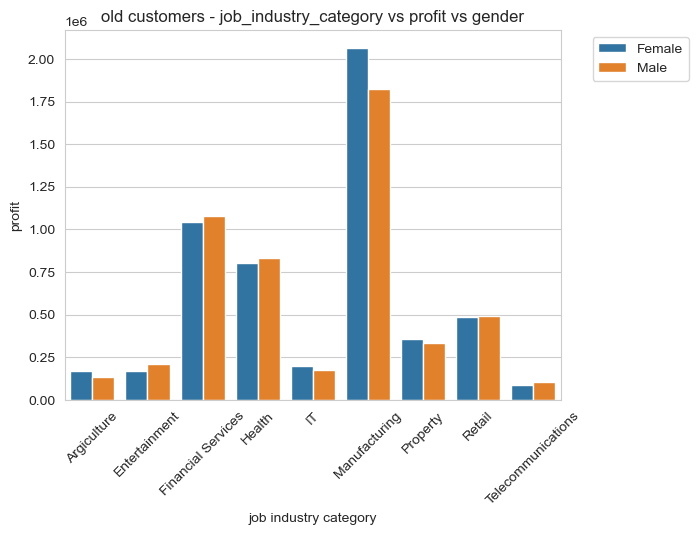

In [37]:
# old customers -job_industry_category vs profit vs gender
job_industry_category_profit = old_customers.groupby(['job_industry_category', 'gender'])['profit'].sum().reset_index()
sns.barplot(data=job_industry_category_profit,x='job_industry_category',y='profit',hue='gender');
plt.xlabel('job industry category');
plt.ylabel('profit');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title("old customers - job_industry_category vs profit vs gender");
plt.xticks(rotation=45);

**Graph observations:** Based on the  graph, we can conclude that female customers in the manufacturing industry generated the highest profit compared to other industries.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


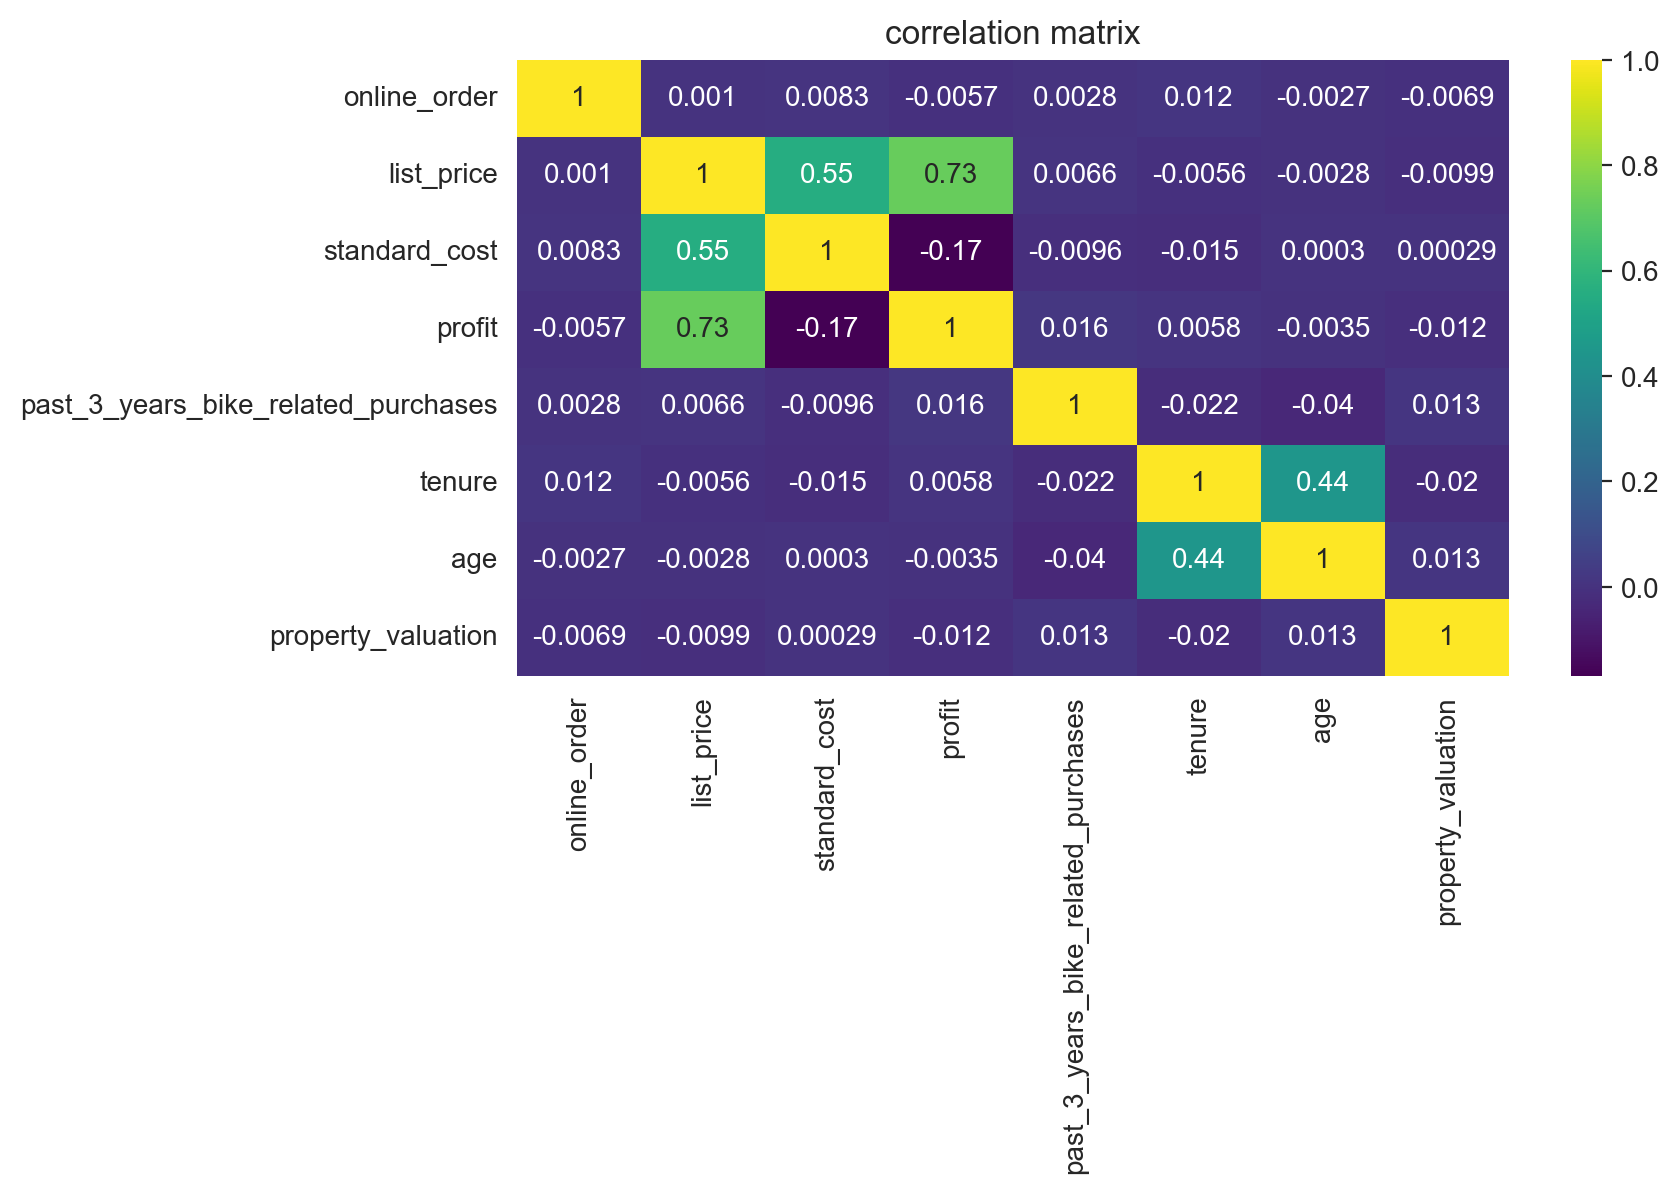

In [38]:
# correlation matrix
plt.figure(figsize = (8,4), dpi = 200);

sns.heatmap(old_customers.corr(), cmap = "viridis", annot = True);
plt.title("correlation matrix");
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

plt.show();

**Graph observations:** Based on the  graph, we can conclude that, there seems to be a lack of strong correlations among the data under investigation.

### Multivariate analysis summary:<a id='multivariate-analysis-summary'></a>

The distributions of the variables of interest are as follows:

**wealth_segment vs profit vs gender_old_customers:** majority of the profit has been generated by female mass customers

**job_industry_category vs profit vs gender_old_customers:** female customers in the manufacturing industry generated the highest profit 

**correlation matrix_old_customers:** there seems to be a lack of strong correlations


----------------------------------------------------------------------------------------------------------------------

## 4.0. RFM Analysis:<a id='rfm-analysis'></a>


Moving on to our analysis, we will be using the RFM framework to segment customers based on their Recency (recent purchases), Frequency (number of purchases), and Monetary value (revenue generated for the company).

RFM analysis is a powerful technique for segmenting customers based on their purchase behavior. Recency refers to how recently a customer has made a purchase, Frequency refers to how often they make purchases, and Monetary refers to how much revenue they generate for the company. By analyzing these three variables together, we can identify groups of customers who are most valuable to the company and target them with specific marketing strategies.

To conduct an RFM analysis, we typically assign scores to each customer based on their Recency, Frequency, and Monetary values. These scores can then be used to group customers into segments, such as high-value customers, loyal customers, at-risk customers, and so on. By understanding the characteristics of each segment, we can tailor our marketing efforts to meet their specific needs and preferences, leading to improved customer retention and revenue growth.

In summary: RFM analysis is used to determine which customers a business should target to increase its revenue and value.The RFM (Recency, Frequency, and Monetary) model shows customers that have displayed high level of engagement with the business  in the three categories mentioned.

In [39]:
# code to calculate Recency , frequency , monetary for each customer

old_customers['transaction_date'] = pd.to_datetime(old_customers['transaction_date'])
end_date = max(old_customers['transaction_date']) + pd.Timedelta(days=1)

old_customers_rfm = old_customers.groupby('customer_id').agg(
    recency=('transaction_date', lambda x: (end_date - x.max()).days),
    frequency=('transaction_id', 'count'),
    monetary=('list_price', 'sum')
).reset_index()

old_customers_rfm.head()

customer_id  recency  frequency  monetary
0           1        8         11   9084.45
1         100       12          2   2748.20
2        1000        1          9  10183.70
3        1001       43          7   6233.51
4        1002      156          4   5038.32

In [40]:
# statitics of the RFM
old_customers_rfm.describe()

recency    frequency      monetary
count  3410.000000  3410.000000   3410.000000
mean     63.078886     5.614076   6209.122718
std      58.741379     2.297353   2927.464891
min       1.000000     1.000000     60.340000
25%      19.000000     4.000000   4111.120000
50%      45.500000     5.000000   5926.430000
75%      88.000000     7.000000   8042.170000
max     354.000000    14.000000  19071.320000

In [41]:
# splitting customer into segments using quantiles
quantiles=old_customers_rfm.quantile(q=[0.25,0.5,0.75])

In [42]:
# checking segments
quantiles.to_dict()

{'recency': {0.25: 19.0, 0.5: 45.5, 0.75: 88.0},
 'frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'monetary': {0.25: 4111.12, 0.5: 5926.43, 0.75: 8042.17}}

In [43]:
# we will segment data into four groups using quantiles 
# for Recency 
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# for Frequency and Monetary value 
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1  

In [44]:
# apply the function to each rfm column to create segment for each customer in each r,f,m column
old_customers_rfm['R'] = old_customers_rfm['recency'].apply(RClass, args=('recency',quantiles))
old_customers_rfm['F'] = old_customers_rfm['frequency'].apply(FMClass, args=('frequency',quantiles))
old_customers_rfm['M'] = old_customers_rfm['monetary'].apply(FMClass, args=('monetary',quantiles))

In [45]:
# calculating RFM class by concatenating the score of each r,f,m & calculating the RFM score by summing the r,f,m segments
old_customers_rfm['RFMClass'] = old_customers_rfm['R'].map(str) + old_customers_rfm['F'].map(str) + old_customers_rfm['M'].map(str)
old_customers_rfm['RFMscore']= old_customers_rfm[['R','F','M']].sum(axis=1)

In [46]:
# checking results
old_customers_rfm.head()

customer_id  recency  frequency  monetary  R  F  M RFMClass  RFMscore
0           1        8         11   9084.45  1  1  1      111         3
1         100       12          2   2748.20  1  4  4      144         9
2        1000        1          9  10183.70  1  1  1      111         3
3        1001       43          7   6233.51  2  2  2      222         6
4        1002      156          4   5038.32  4  4  3      443        11

In [47]:
# checking results
old_customers_rfm.describe()

recency    frequency      monetary            R            F  \
count  3410.000000  3410.000000   3410.000000  3410.000000  3410.000000   
mean     63.078886     5.614076   6209.122718     2.487977     2.647507   
std      58.741379     2.297353   2927.464891     1.121277     1.134321   
min       1.000000     1.000000     60.340000     1.000000     1.000000   
25%      19.000000     4.000000   4111.120000     1.000000     2.000000   
50%      45.500000     5.000000   5926.430000     2.500000     3.000000   
75%      88.000000     7.000000   8042.170000     3.000000     4.000000   
max     354.000000    14.000000  19071.320000     4.000000     4.000000   

                 M     RFMscore  
count  3410.000000  3410.000000  
mean      2.500293     7.635777  
std       1.118722     2.679389  
min       1.000000     3.000000  
25%       1.250000     5.000000  
50%       2.500000     8.000000  
75%       4.000000    10.000000  
max       4.000000    12.000000

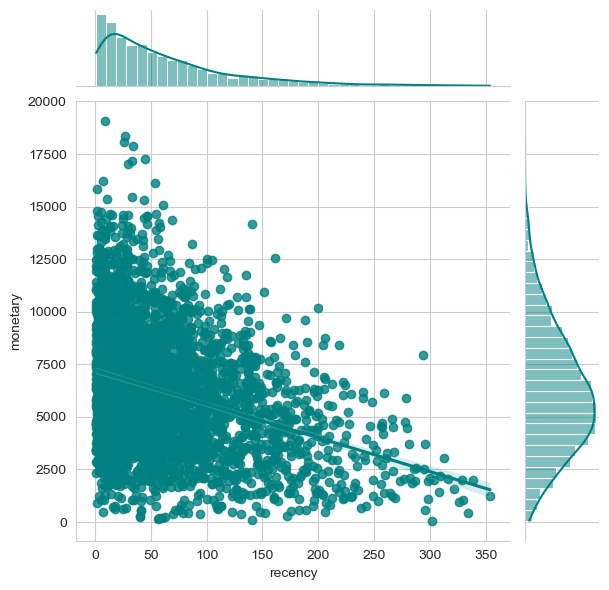

In [48]:
# checking for relation between Recency and Monetary
sns.jointplot(x='recency',y='monetary',data=old_customers_rfm,kind='reg', color='teal');

**Scatter-Plot observations:** Based on Scatter-Plot, we can conclude that customers who made purchases more recently have generated more revenue compared to customers who visited a while ago. Customers who made purchases in the recent past, within the range of 50-100 days, also appear to generate a moderate amount of revenue. However, those who visited more than 200 days ago tend to generate low revenue.

The visual clearly indicates a strong negative correlation between Recency and Monetary

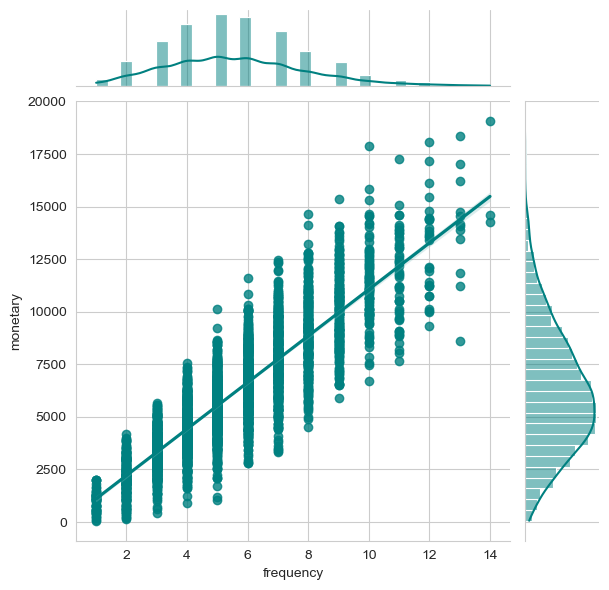

In [49]:
# checking for relation between Frequency and Monetary
sns.jointplot(x='frequency',y='monetary',data=old_customers_rfm,kind='reg', color='teal');

**Scatter-Plot observations:** Based on Scatter-Plot, we can conclude that the visualization clearly indicates a strong positive correlation between the frequency of purchases and the monetary value of purchases. This suggests that customers who make more purchases tend to spend more money, which can be a useful insight for targeted marketing and customer retention strategies.

The visual clearly indicates a natural positive relationship between frequency and monetary gain for the business.

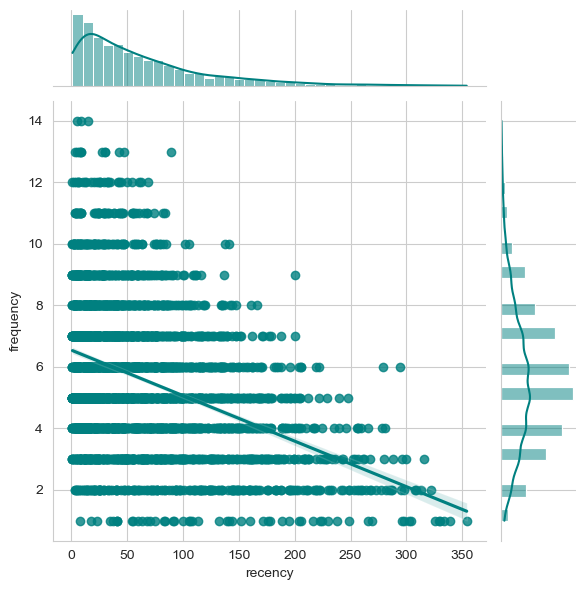

In [50]:
# checking for relation between Recency and Frequency
sns.jointplot(x='recency',y='frequency',data=old_customers_rfm,kind='reg',color='teal');

**Scatter-Plot observations:** Based on Scatter-Plot, we can conclude that very low frequency of 0-2 correlated with high recency values. i.e. More than 250 days ago. Customers that have visited more recently (0-50 days) have a higher chance of visiting more frequently. Higher frequency has a negative relationship with recency values. Such that very recent customers are also frequent customers.

### 4.1. Customer Segmentation:<a id='customer-segmentation'></a>

**Assign a loyality level to each customer**

In [51]:
# assigning loyality level to each customer using qcut method which segments data as per number of quantiles decided
Loyality_level=['Bronze', 'Silver', 'Gold', 'Platinum']
score_cuts=pd.qcut(old_customers_rfm['RFMscore'],q=4,labels=Loyality_level)
old_customers_rfm['RFM_loyalty_level']=score_cuts.values
old_customers_rfm.head()

customer_id  recency  frequency  monetary  R  F  M RFMClass  RFMscore  \
0           1        8         11   9084.45  1  1  1      111         3   
1         100       12          2   2748.20  1  4  4      144         9   
2        1000        1          9  10183.70  1  1  1      111         3   
3        1001       43          7   6233.51  2  2  2      222         6   
4        1002      156          4   5038.32  4  4  3      443        11   

  RFM_loyalty_level  
0            Bronze  
1              Gold  
2            Bronze  
3            Silver  
4          Platinum

In [52]:
# sorting the most valued customers
old_customers_rfm.sort_values(['RFMscore', 'RFM_loyalty_level'], ascending=False).head()

customer_id  recency  frequency  monetary  R  F  M RFMClass  RFMscore  \
13        1010      127          3   1501.59  4  4  4      444        12   
14        1011      243          3   3940.18  4  4  4      444        12   
24        1020       90          4   4075.21  4  4  4      444        12   
27        1023      126          2   1579.39  4  4  4      444        12   
39        1034      105          2   1819.46  4  4  4      444        12   

   RFM_loyalty_level  
13          Platinum  
14          Platinum  
24          Platinum  
27          Platinum  
39          Platinum

In [53]:
# check the rfmscore counts
old_customers_rfm['RFMscore'].value_counts()

9     410
7     404
5     396
6     381
8     370
12    330
10    317
11    308
4     294
3     200
Name: RFMscore, dtype: int64

In [54]:
# assign a customer_title based on rfm score
customer_title = {3: 'Evasive Customer',
                  4: 'Almost Lost Customer',
                  5: 'High Risk Customer',
                  6: 'Losing Customer',
                  7: 'Late bloomer',
                  8: 'Potential Customer',
                  9: 'Recent Customer',
                  10: 'Becoming Loyal',
                  11: 'Very Loyal',
                  12: 'Platinum Customer'}
old_customers_rfm['customer_title'] = old_customers_rfm['RFMscore'].map(customer_title)
old_customers_rfm

customer_id  recency  frequency  monetary  R  F  M RFMClass  RFMscore  \
0              1        8         11   9084.45  1  1  1      111         3   
1            100       12          2   2748.20  1  4  4      144         9   
2           1000        1          9  10183.70  1  1  1      111         3   
3           1001       43          7   6233.51  2  2  2      222         6   
4           1002      156          4   5038.32  4  4  3      443        11   
...          ...      ...        ...       ... .. .. ..      ...       ...   
3405         994       43          5   3901.01  2  3  4      234         9   
3406         995       12          7   9379.04  1  2  1      121         4   
3407         997       60          7   6397.73  3  2  2      322         7   
3408         998      322          2   1565.55  4  4  4      444        12   
3409         999       55         10  14662.14  3  1  1      311         5   

     RFM_loyalty_level        customer_title  
0               Bronze      Evasive Customer  
1                 Gold       Recent Customer  
2               Bronze      Evasive Customer  
3               Silver       Losing Customer  
4             Platinum            Very Loyal  
...                ...                   ...  
3405              Gold       Recent Customer  
3406            Bronze  Almost Lost Customer  
3407            Silver          Late bloomer  
3408          Platinum     Platinum Customer  
3409            Bronze    High Risk Customer  

[3410 rows x 11 columns]

In [55]:
# assign customer title description based on customer title
customer_title_description = { 
                  'Evasive Customer':'Very low recency, Very low frequency, small amount spent',
                  'Almost Lost Customer':'Very low recency, low frequency, but high amount spent',
                  'High Risk Customer':'Purchase was long time ago, frequency is quite high, amount spent is high',
                  'Losing Customer':'Purchases was a while ago, below average RFM value',
                  'Late bloomer':'No purchases recently, but RFM value is larger than average',
                  'Potential Customer':'Bought recently, never bought before, spent small amount',
                  'Recent Customer':'Bought recently, not very often, average money spent',
                  'Becoming Loyal':'Relatively recent, bought more than once, spends large amount of money',
                  'Very Loyal':'Most recent, buys often, spends large amount of money',
                  'Platinum Customer':'Most recent buy, buys often, most spent'}
old_customers_rfm['customer_title_description'] = old_customers_rfm['customer_title'].map(customer_title_description)
old_customers_rfm

customer_id  recency  frequency  monetary  R  F  M RFMClass  RFMscore  \
0              1        8         11   9084.45  1  1  1      111         3   
1            100       12          2   2748.20  1  4  4      144         9   
2           1000        1          9  10183.70  1  1  1      111         3   
3           1001       43          7   6233.51  2  2  2      222         6   
4           1002      156          4   5038.32  4  4  3      443        11   
...          ...      ...        ...       ... .. .. ..      ...       ...   
3405         994       43          5   3901.01  2  3  4      234         9   
3406         995       12          7   9379.04  1  2  1      121         4   
3407         997       60          7   6397.73  3  2  2      322         7   
3408         998      322          2   1565.55  4  4  4      444        12   
3409         999       55         10  14662.14  3  1  1      311         5   

     RFM_loyalty_level        customer_title  \
0               Bronze      Evasive Customer   
1                 Gold       Recent Customer   
2               Bronze      Evasive Customer   
3               Silver       Losing Customer   
4             Platinum            Very Loyal   
...                ...                   ...   
3405              Gold       Recent Customer   
3406            Bronze  Almost Lost Customer   
3407            Silver          Late bloomer   
3408          Platinum     Platinum Customer   
3409            Bronze    High Risk Customer   

                             customer_title_description  
0     Very low recency, Very low frequency, small am...  
1     Bought recently, not very often, average money...  
2     Very low recency, Very low frequency, small am...  
3     Purchases was a while ago, below average RFM v...  
4     Most recent, buys often, spends large amount o...  
...                                                 ...  
3405  Bought recently, not very often, average money...  
3406  Very low recency, low frequency, but high amou...  
3407  No purchases recently, but RFM value is larger...  
3408            Most recent buy, buys often, most spent  
3409  Purchase was long time ago, frequency is quite...  

[3410 rows x 12 columns]

In [56]:
# assign rank to customers based on the customer title
customer_rank = {
    'Platinum Customer': 1,
    'Very Loyal': 2,
    'Becoming Loyal': 3,
    'Recent Customer': 4,
    'Potential Customer': 5,
    'Late bloomer': 6,
    'Losing Customer': 7,
    'High Risk Customer': 8,
    'Almost Lost Customer': 9,
    'Evasive Customer': 10,
    'Last customer': 11
}
old_customers_rfm['customer_rank'] = old_customers_rfm['customer_title'].map(customer_rank)
old_customers_rfm

customer_id  recency  frequency  monetary  R  F  M RFMClass  RFMscore  \
0              1        8         11   9084.45  1  1  1      111         3   
1            100       12          2   2748.20  1  4  4      144         9   
2           1000        1          9  10183.70  1  1  1      111         3   
3           1001       43          7   6233.51  2  2  2      222         6   
4           1002      156          4   5038.32  4  4  3      443        11   
...          ...      ...        ...       ... .. .. ..      ...       ...   
3405         994       43          5   3901.01  2  3  4      234         9   
3406         995       12          7   9379.04  1  2  1      121         4   
3407         997       60          7   6397.73  3  2  2      322         7   
3408         998      322          2   1565.55  4  4  4      444        12   
3409         999       55         10  14662.14  3  1  1      311         5   

     RFM_loyalty_level        customer_title  \
0               Bronze      Evasive Customer   
1                 Gold       Recent Customer   
2               Bronze      Evasive Customer   
3               Silver       Losing Customer   
4             Platinum            Very Loyal   
...                ...                   ...   
3405              Gold       Recent Customer   
3406            Bronze  Almost Lost Customer   
3407            Silver          Late bloomer   
3408          Platinum     Platinum Customer   
3409            Bronze    High Risk Customer   

                             customer_title_description  customer_rank  
0     Very low recency, Very low frequency, small am...             10  
1     Bought recently, not very often, average money...              4  
2     Very low recency, Very low frequency, small am...             10  
3     Purchases was a while ago, below average RFM v...              7  
4     Most recent, buys often, spends large amount o...              2  
...                                                 ...            ...  
3405  Bought recently, not very often, average money...              4  
3406  Very low recency, low frequency, but high amou...              9  
3407  No purchases recently, but RFM value is larger...              6  
3408            Most recent buy, buys often, most spent              1  
3409  Purchase was long time ago, frequency is quite...              8  

[3410 rows x 13 columns]

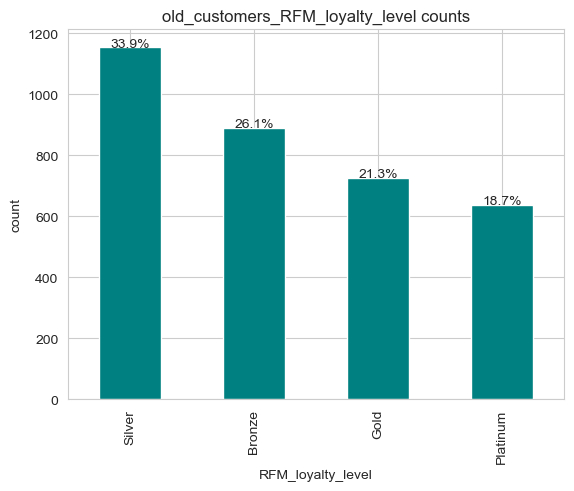

In [57]:
# count the occurrences of RFM_loyalty_level
counts = old_customers_rfm['RFM_loyalty_level'].value_counts()
counts.plot(kind='bar',color='teal')
plt.title('old_customers_RFM_loyalty_level counts')
plt.xlabel('RFM_loyalty_level')
plt.ylabel('count')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')
    
plt.show()

**Graph observations:** Based on the graph, it can be inferred that the majority of the customer base, roughly 70%, consists of silver and bronze customers, while gold and platinum customers make up approximately 25% of the total customer base.

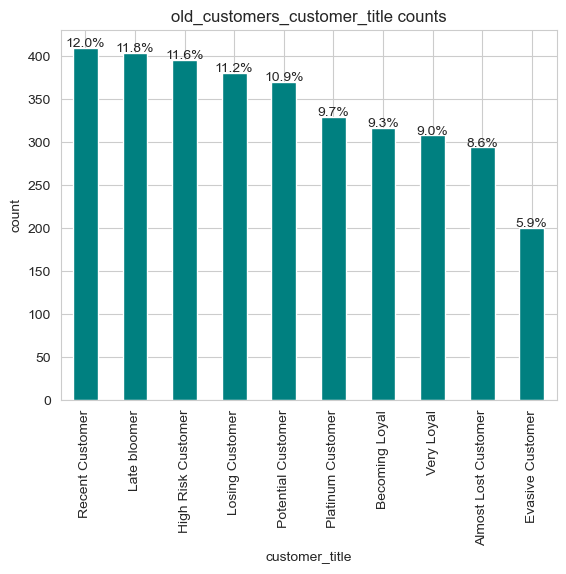

In [58]:
# count the occurrences of customer_rank
counts = old_customers_rfm['customer_title'].value_counts()
counts.plot(kind='bar',color='teal')
plt.title('old_customers_customer_title counts')
plt.xlabel('customer_title')
plt.ylabel('count')

# add percentages on top of the bars
for i, v in enumerate(counts):
    plt.text(i, v + 1, f'{(v/counts.sum()*100):.1f}%', ha='center')

plt.show()

**Graph observations:** Based on the graph, it can be inferred that that the poorly performing customer segments, including high risk, losing, almost lost, and evasive customers, account for roughly half of the customer base. On the other hand, the remaining half is made up of customer segments such as late bloomers, potential customers, recent customers, becoming loyal customers, very loyal customers, and platinum customers. This segregation is especially useful for determining which ones are at risk of leaving, and which ones we should focus on for retention efforts.

**Joinning old_customers_rfm dataset to original old_customers dataset**

In [59]:
# joinning dataset
old_customers_rfm=old_customers.merge(old_customers_rfm,on='customer_id',how='inner')

In [60]:
# checking the final result
old_customers_rfm.head()

transaction_id product_id customer_id transaction_date  online_order  \
0              1          2        2950       2017-02-25         False   
1          11065          1        2950       2017-10-16         False   
2          18923         62        2950       2017-04-26         False   
3              2          3        3120       2017-05-21          True   
4           6862          4        3120       2017-10-05         False   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        Medium       Medium  ...   
1     Approved  Giant Bicycles     Standard        Medium       Medium  ...   
2     Approved           Solex     Standard        Medium       Medium  ...   
3     Approved   Trek Bicycles     Standard        Medium        Large  ...   
4     Approved  Giant Bicycles     Standard          High       Medium  ...   

   monetary  R  F  M RFMClass RFMscore RFM_loyalty_level   customer_title  \
0   1953.15  3  4  4      344       11          Platinum       Very Loyal   
1   1953.15  3  4  4      344       11          Platinum       Very Loyal   
2   1953.15  3  4  4      344       11          Platinum       Very Loyal   
3   7351.70  2  2  2      222        6            Silver  Losing Customer   
4   7351.70  2  2  2      222        6            Silver  Losing Customer   

                          customer_title_description customer_rank  
0  Most recent, buys often, spends large amount o...             2  
1  Most recent, buys often, spends large amount o...             2  
2  Most recent, buys often, spends large amount o...             2  
3  Purchases was a while ago, below average RFM v...             7  
4  Purchases was a while ago, below average RFM v...             7  

[5 rows x 48 columns]

In [61]:
# check the shape of the final dataset
old_customers_rfm.shape

(19144, 48)

In [62]:
# check the columns of final dataset
old_customers_rfm.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'transaction_year', 'transaction_month',
       'transaction_day', 'day_of_the_week', 'profit', 'first_name',
       'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'age_group',
       'address', 'postcode', 'state', 'country', 'property_valuation',
       'recency', 'frequency', 'monetary', 'R', 'F', 'M', 'RFMClass',
       'RFMscore', 'RFM_loyalty_level', 'customer_title',
       'customer_title_description', 'customer_rank'],
      dtype='object')

In [63]:
# count the occurrences of  rfm loyalty level
old_customers_rfm['RFM_loyalty_level'].value_counts()

Bronze      7366
Silver      6869
Gold        3016
Platinum    1893
Name: RFM_loyalty_level, dtype: int64

In [64]:
# Selecting customers with Platinum loyalty level and sorting by RFM score in descending order
platinum_customers = old_customers_rfm[old_customers_rfm['RFM_loyalty_level'] == 'Platinum'][['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'job_industry_category', 'wealth_segment', 'owns_car', 'age_group', 'state', 'RFMscore', 'RFM_loyalty_level','customer_title','customer_title_description','customer_rank']].sort_values('RFMscore', ascending=False)
platinum_customers

customer_id  gender  past_3_years_bike_related_purchases  \
14124        2090    Male                                   63   
10910        1922  Female                                    7   
17861        2499  Female                                   77   
17841         774  Female                                   79   
17840        2387    Male                                   33   
...           ...     ...                                  ...   
13223        1085    Male                                    4   
13222        1085    Male                                    4   
13118          35  Female                                   40   
13117          35  Female                                   40   
19138        2764  Female                                   12   

      job_industry_category  wealth_segment owns_car age_group state  \
14124    Financial Services   Mass Customer      Yes     51-70   NSW   
10910         Manufacturing  High Net Worth      Yes     51-70   VIC   
17861                Retail   Mass Customer       No     31-50   QLD   
17841         Manufacturing  High Net Worth       No     20-30   VIC   
17840         Manufacturing  High Net Worth      Yes     31-50   NSW   
...                     ...             ...      ...       ...   ...   
13223                Health   Mass Customer       No     31-50   QLD   
13222                Health   Mass Customer       No     31-50   QLD   
13118                Health  High Net Worth      Yes     51-70   QLD   
13117                Health  High Net Worth      Yes     51-70   QLD   
19138    Financial Services   Mass Customer      Yes     51-70   QLD   

       RFMscore RFM_loyalty_level     customer_title  \
14124        12          Platinum  Platinum Customer   
10910        12          Platinum  Platinum Customer   
17861        12          Platinum  Platinum Customer   
17841        12          Platinum  Platinum Customer   
17840        12          Platinum  Platinum Customer   
...         ...               ...                ...   
13223        11          Platinum         Very Loyal   
13222        11          Platinum         Very Loyal   
13118        11          Platinum         Very Loyal   
13117        11          Platinum         Very Loyal   
19138        11          Platinum         Very Loyal   

                              customer_title_description  customer_rank  
14124            Most recent buy, buys often, most spent              1  
10910            Most recent buy, buys often, most spent              1  
17861            Most recent buy, buys often, most spent              1  
17841            Most recent buy, buys often, most spent              1  
17840            Most recent buy, buys often, most spent              1  
...                                                  ...            ...  
13223  Most recent, buys often, spends large amount o...              2  
13222  Most recent, buys often, spends large amount o...              2  
13118  Most recent, buys often, spends large amount o...              2  
13117  Most recent, buys often, spends large amount o...              2  
19138  Most recent, buys often, spends large amount o...              2  

[1893 rows x 13 columns]

In [65]:
# Selecting customers with Gold loyalty level and sorting by RFM score in descending order
gold_customers = old_customers_rfm[old_customers_rfm['RFM_loyalty_level'] == 'Gold'][['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'job_industry_category', 'wealth_segment', 'owns_car', 'age_group', 'state', 'RFMscore', 'RFM_loyalty_level','customer_title','customer_title_description','customer_rank']].sort_values('RFMscore', ascending=False)
gold_customers

customer_id  gender  past_3_years_bike_related_purchases  \
41           1542    Male                                   56   
8521           68  Female                                   37   
16154        2491    Male                                   74   
16155        2491    Male                                   74   
8627         2456    Male                                    9   
...           ...     ...                                  ...   
9327          348    Male                                   20   
9328          348    Male                                   20   
9352         2208  Female                                   59   
9353         2208  Female                                   59   
19143        3464  Female                                   38   

      job_industry_category     wealth_segment owns_car age_group state  \
41                   Health      Mass Customer      Yes     31-50   NSW   
8521          Manufacturing  Affluent Customer       No     31-50   VIC   
16154                Health      Mass Customer       No     31-50   VIC   
16155                Health      Mass Customer       No     31-50   VIC   
8627          Manufacturing      Mass Customer       No     31-50   VIC   
...                     ...                ...      ...       ...   ...   
9327                 Retail      Mass Customer      Yes     31-50   NSW   
9328                 Retail      Mass Customer      Yes     31-50   NSW   
9352          Manufacturing      Mass Customer       No     51-70   NSW   
9353          Manufacturing      Mass Customer       No     51-70   NSW   
19143    Financial Services      Mass Customer      Yes     31-50   NSW   

       RFMscore RFM_loyalty_level   customer_title  \
41           10              Gold   Becoming Loyal   
8521         10              Gold   Becoming Loyal   
16154        10              Gold   Becoming Loyal   
16155        10              Gold   Becoming Loyal   
8627         10              Gold   Becoming Loyal   
...         ...               ...              ...   
9327          9              Gold  Recent Customer   
9328          9              Gold  Recent Customer   
9352          9              Gold  Recent Customer   
9353          9              Gold  Recent Customer   
19143         9              Gold  Recent Customer   

                              customer_title_description  customer_rank  
41     Relatively recent, bought more than once, spen...              3  
8521   Relatively recent, bought more than once, spen...              3  
16154  Relatively recent, bought more than once, spen...              3  
16155  Relatively recent, bought more than once, spen...              3  
8627   Relatively recent, bought more than once, spen...              3  
...                                                  ...            ...  
9327   Bought recently, not very often, average money...              4  
9328   Bought recently, not very often, average money...              4  
9352   Bought recently, not very often, average money...              4  
9353   Bought recently, not very often, average money...              4  
19143  Bought recently, not very often, average money...              4  

[3016 rows x 13 columns]

### RFM analysis summary:<a id='rfm-analysis-summary'></a>


Our analysis has resulted in the segmentation of customers into four distinct groups and eleven distinct sub groups based on their Recency, Frequency, and Monetary values. This will allow us to tailor our marketing strategies to each group accordingly. Moving forward, we will shift our focus to the next phase of the project: machine learning modeling.

Moving to machine learning modeling is a logical next step in the project. By segmenting customers into different groups based on RFM analysis, we can now focus on developing a predictive model that will help us better understand customer behavior and improve marketing strategies. The model can help us predict which customers are likely to make a purchase in the future, which ones are at risk of leaving, and which ones we should focus on for retention efforts. This will ultimately lead to increased revenue and better customer satisfaction.

In [66]:
# exporting our CTA dataframe to use it in phase 3 from our project
old_customers_rfm.to_csv('old_customers_rfm.csv')

----------------------------------------------------------------------------------------------------------------------

Cheers,  
Vamsi Krishna Kamatham